# Data augmentation 
---
Today we will be talking about image preprocessing and data augmentation.

Table of contents:

* Setup
* Resize
* Grayscale
* Pad
* Gaussian Blur
* Normalize
* Random Affine
* Random horizontal flip
* Random vertical flip
* Random rotation
* Color Jitter
* CutOut
* MixUp
* CutMix
* Mosaic

## Setup

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.simplefilter("ignore")


def show_dataset(dataset, n=6):
    img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def show_transform(transform, data_path="./data/"):

    dataset = ImageFolder(data_path, transform=transform)
    show_dataset(dataset)

## Resize
$
(W, \ H) \rightarrow (W_{new}, \ H_{new}) $

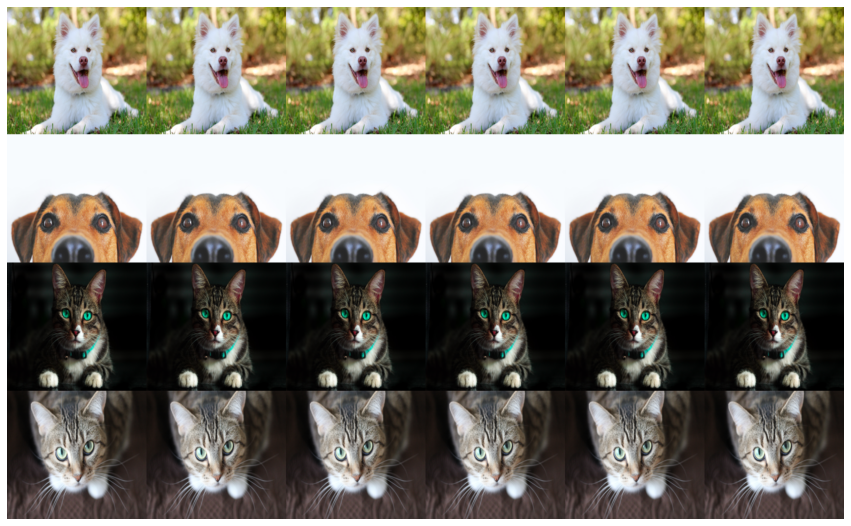

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 244))
])

show_transform(transform)

## Grayscale
$
(W, \ H, \ C) \rightarrow (W, \ H, \ cnum)
$

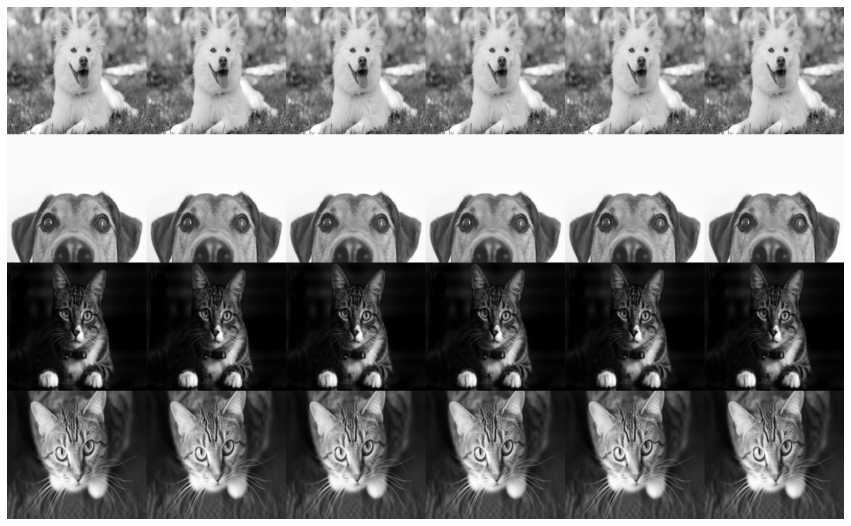

In [3]:
cnum = 3

transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.Grayscale(cnum)
])

show_transform(transform)

## Pad 
* padding : int, tuple
* fill : int, tuple
* mode : *constant, edge, reflect, symmetric*

$
(W, \ H, \ C) \rightarrow (W + pad, \ H + pad, \ C)
$

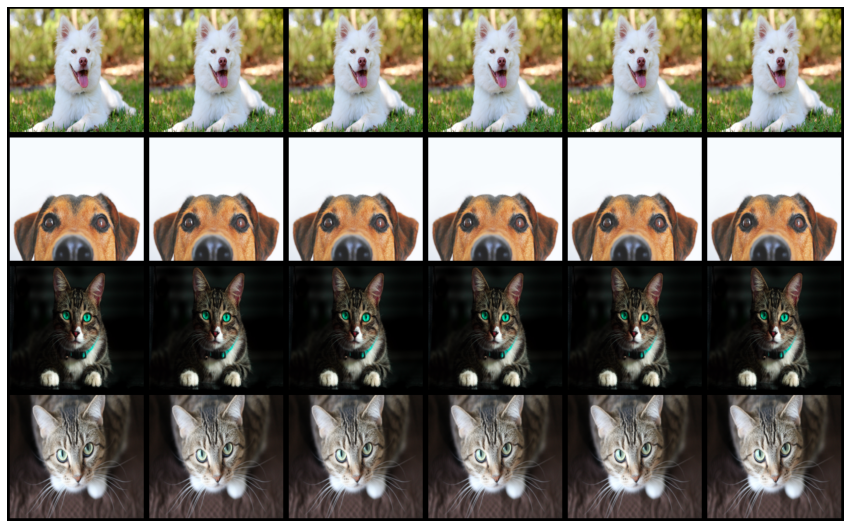

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.Pad(5)
])

show_transform(transform)

## Gaussian Blur
Randomly chosen Gaussian Blur.

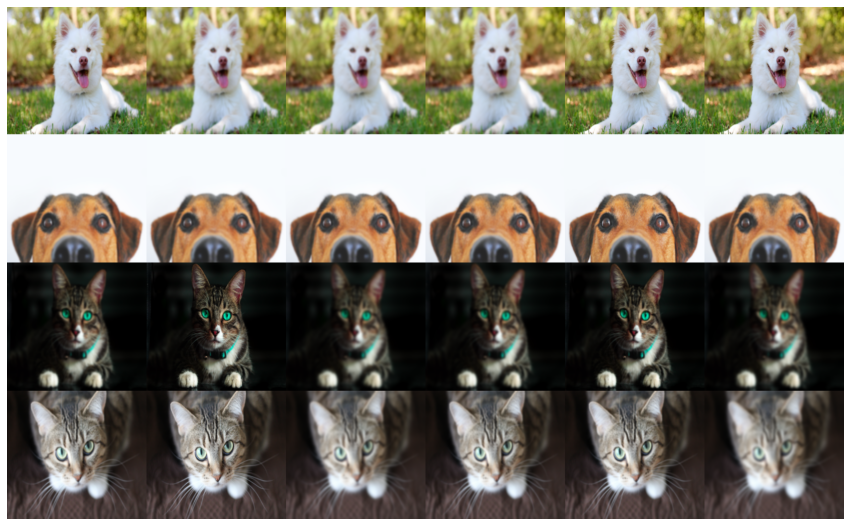

In [10]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.GaussianBlur(kernel_size=31, sigma=(0.1, 2.0))
])

show_transform(transform)

## Random affine

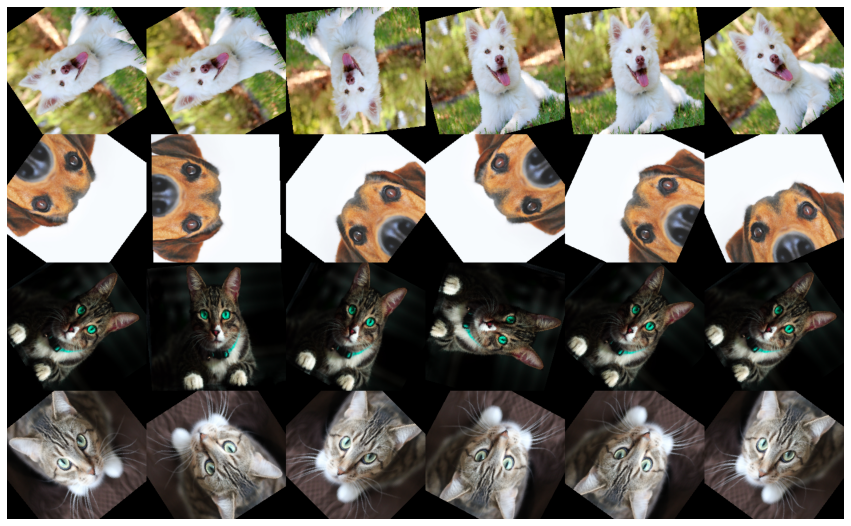

In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.RandomAffine((-180, 180))
])

show_transform(transform)

## Random horizontal flip
* p - probability

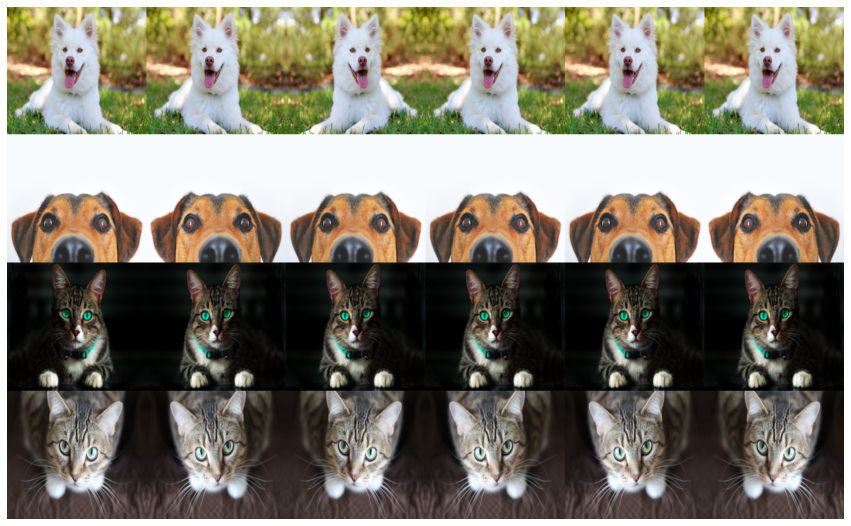

In [14]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.RandomHorizontalFlip(p=0.5)
])

show_transform(transform)

## Random vertical flip
* p - probability

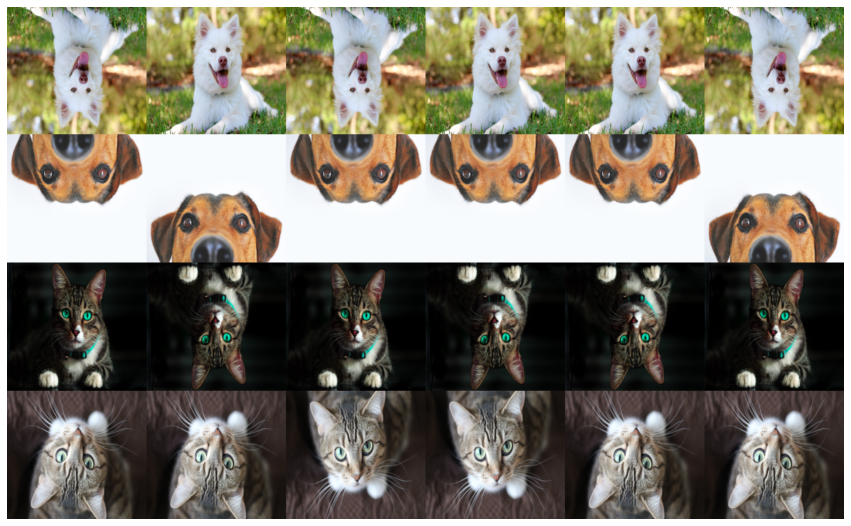

In [15]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.RandomVerticalFlip(p=0.5)
])

show_transform(transform)

## Random rotation
* degree

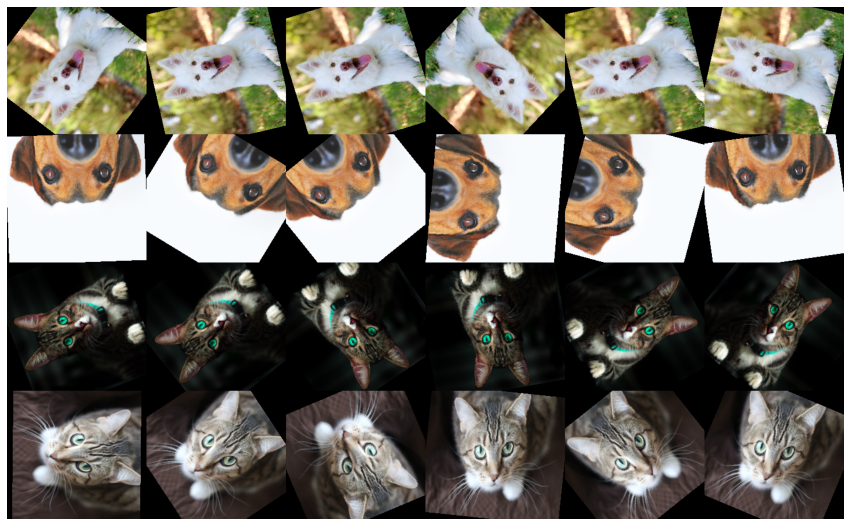

In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.RandomRotation((-180, 180))
])

show_transform(transform)

## Color Jitter
* brightness
* contrast
* saturation
* hue

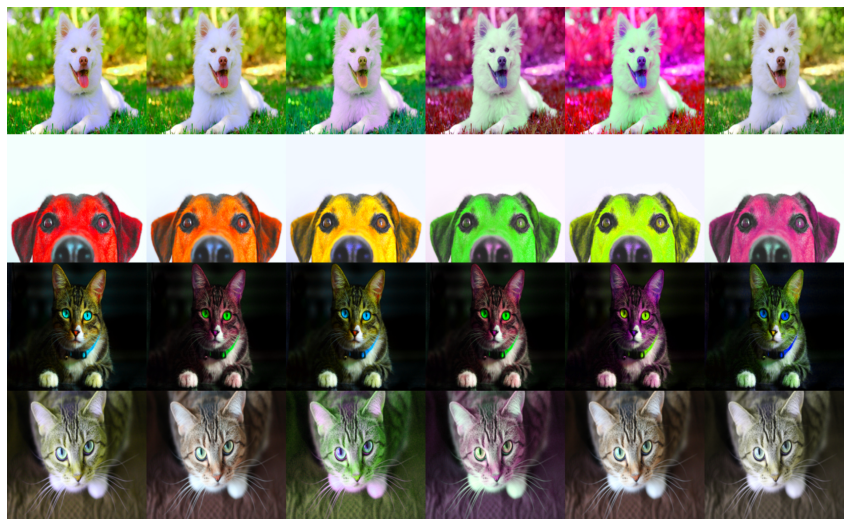

In [24]:
transform = transforms.Compose([
    transforms.Resize((224, 244)),
    transforms.ColorJitter(brightness=0,contrast=0,saturation=(1, 2.5),hue=(-0.25, 0.25))
])

show_transform(transform)

## Normalize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


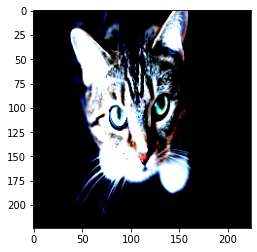

In [28]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
])

dataset = ImageFolder("./data/", transform=transform)
img = dataset[3][0].transpose(0, 2).transpose(0, 1)
torchvision.utils.make_grid(torch.as_tensor(img)).shape
plt.imshow(torchvision.utils.make_grid(torch.as_tensor(img)))
plt.show()

## CutOut

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


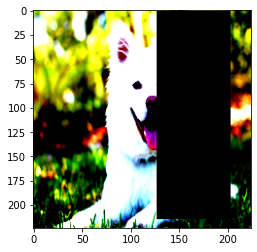

In [29]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.RandomErasing(),
])

dataset = ImageFolder("./data/", transform=transform)
img = dataset[0][0].transpose(0, 2).transpose(0, 1)
torchvision.utils.make_grid(torch.as_tensor(img)).shape
plt.imshow(torchvision.utils.make_grid(torch.as_tensor(img)))
plt.show()

## MixUp
$
X_{1,2} = \alpha X_1 + (1-\alpha)X_2 \\ 
Y_{1,2}=\alpha Y_1 + (1-\alpha)Y_2
$

In [35]:
def mixup(data, target, alpha):
    indices = torch.randperm(data.size(0))
    shuffled_data = data[indices]
    shuffled_target = target[indices]

    lam = np.clip(np.random.beta(alpha, alpha),0.3,0.7)
    data = lam*data + (1-lam)*shuffled_data
    targets = (target, shuffled_target, lam)

    return data , targets

## CutMix
$
X_c=M\odot X_a+( 1-M) \odot X_b \\
Y_c = \lambda Y_a + (1 - \lambda)Y_b \\ 
X_a, \ X_b - image \ h \times w \\
M - binary \ mask \ h \times w
$

In [ ]:
def cutmix(data, target, alpha):
    indices = torch.randperm(data.size(0))
    shuffled_data = data[indices]
    shuffled_target = target[indices]

    lam = np.clip(np.random.beta(alpha, alpha),0.3,0.4)
    bbx1, bby1, bbx2, bby2 = rand_bbox(data.size(), lam)
    new_data = data.clone()
    new_data[:, :, bby1:bby2, bbx1:bbx2] = data[indices, :, bby1:bby2, bbx1:bbx2]
    
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (data.size()[-1] * data.size()[-2]))
    targets = (target, shuffled_target, lam)

    return new_data, targets

## Mosaic
![Mosaic](./img/mosaic.png)

## Putting all together
With those transforms we can create complex pipeline

### Exercise
Create own pipeline that 

In [ ]:
transform = transforms.Compose([
    
])